### Importação dos dados



In [55]:
import pandas as pd
import matplotlib.pyplot as plt

l1 = "Lojas/loja_1.csv"
l2 = "Lojas/loja_2.csv"
l3 = "Lojas/loja_3.csv"
l4 = "Lojas/loja_4.csv"

loja1 = pd.read_csv(l1)
loja2 = pd.read_csv(l2)
loja3 = pd.read_csv(l3)
loja4 = pd.read_csv(l4)

loja2.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66
2,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95
3,Cama king,moveis,1208.24,61.919584,04/05/2022,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79


#1. Análise do faturamento


Faturamento: Loja 1 - R$ 1,534,509.12 Loja 2 - R$ 1,488,459.06 Loja 3 - R$ 1,464,025.03 Loja 4 - R$ 1,384,497.58


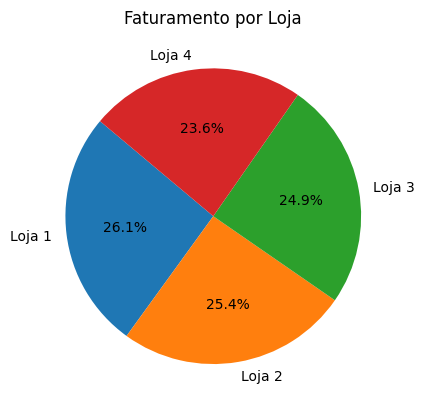

In [82]:
loja1_faturamento = loja1["Preço"].sum().item()
loja2_faturamento = loja2["Preço"].sum().item()
loja3_faturamento = loja3["Preço"].sum().item()
loja4_faturamento = loja4["Preço"].sum().item()
print(f"Faturamento: Loja 1 - R$ {loja1_faturamento:,.2f} Loja 2 - R$ {loja2_faturamento:,.2f} Loja 3 - R$ {loja3_faturamento:,.2f} Loja 4 - R$ {loja4_faturamento:,.2f}")

todos_faturamentos = [loja1_faturamento, loja2_faturamento, loja3_faturamento, loja4_faturamento]
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

plt.pie(todos_faturamentos, labels=lojas, autopct="%1.1f%%", startangle=140)
plt.title("Faturamento por Loja")
plt.show()


In [3]:
faturamento_total = loja1_faturamento + loja2_faturamento + loja3_faturamento + loja4_faturamento
print(f"Faturamento total: R$: {faturamento_total:,.2f}")

Faturamento total: R$: 5,871,490.79


# 2. Vendas por Categoria


    Categoria do Produto  Quantidade
0             brinquedos        1290
1       eletrodomesticos        1149
2            eletronicos        1772
3        esporte e lazer        1113
4  instrumentos musicais         753
5                 livros         742
6                 moveis        1886
7  utilidades domesticas         730


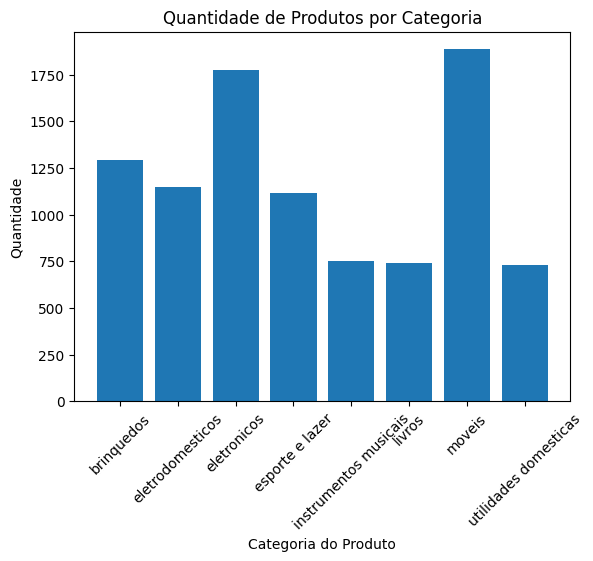

In [85]:
categoria1 = (
    loja1.groupby("Categoria do Produto")["Produto"]
    .count()
    .reset_index(name="Quantidade")
)

categoria2 = (
    loja2.groupby("Categoria do Produto")["Produto"]
    .count()
    .reset_index(name="Quantidade")
)

categoria3 = (
    loja3.groupby("Categoria do Produto")["Produto"]
    .count()
    .reset_index(name="Quantidade")
)

categoria4 = (
    loja4.groupby("Categoria do Produto")["Produto"]
    .count()
    .reset_index(name="Quantidade")
)
categoria3

todas_categorias = pd.concat([categoria1, categoria2, categoria3, categoria4])

soma_categorias = todas_categorias.groupby("Categoria do Produto")["Quantidade"].sum().reset_index()

print(soma_categorias)

plt.bar(soma_categorias["Categoria do Produto"], soma_categorias["Quantidade"])
plt.xticks(rotation=45)
plt.xlabel("Categoria do Produto")
plt.ylabel("Quantidade")
plt.title("Quantidade de Produtos por Categoria")
plt.show()

# 3. Média de Avaliação das Lojas

In [5]:
avaliacao1 = loja1["Avaliação da compra"].mean().item()
avaliacao2 = loja2["Avaliação da compra"].mean().item()
avaliacao3 = loja3["Avaliação da compra"].mean().item()
avaliacao4 = loja4["Avaliação da compra"].mean().item()

print(f"Loja 1 - {round(avaliacao1, 2)}, Loja 2 - {round(avaliacao2, 2)}, Loja 3 - {round(avaliacao3, 2)}, Loja 4 - {round(avaliacao4, 2)}")


Loja 1 - 3.98, Loja 2 - 4.04, Loja 3 - 4.05, Loja 4 - 4.0


# 4. Produtos Mais e Menos Vendidos

In [39]:
produto_mais1 = loja1["Produto"].value_counts()
produto_mais2 = loja2["Produto"].value_counts()
produto_mais3 = loja3["Produto"].value_counts()
produto_mais4 = loja4["Produto"].value_counts()

resultado = f"""
- Loja 1 - Produto mais vendido: {produto_mais1.index[0]} e o produto menos vendido: {produto_mais1.index[-1]}
- Loja 2 - Produto mais vendido: {produto_mais2.index[0]} e o produto menos vendido: {produto_mais2.index[-1]}
- Loja 3 - Produto mais vendido: {produto_mais3.index[0]} e o produto menos vendido: {produto_mais3.index[-1]}
- Loja 4 - Produto mais vendido: {produto_mais4.index[0]} e o produto menos vendido: {produto_mais4.index[-1]}
"""

print(resultado)



- Loja 1 - Produto mais vendido: Micro-ondas e o produto menos vendido: Celular ABXY
- Loja 2 - Produto mais vendido: Iniciando em programação e o produto menos vendido: Jogo de tabuleiro
- Loja 3 - Produto mais vendido: Kit banquetas e o produto menos vendido: Blocos de montar
- Loja 4 - Produto mais vendido: Cama box e o produto menos vendido: Guitarra



# 5. Frete Médio por Loja


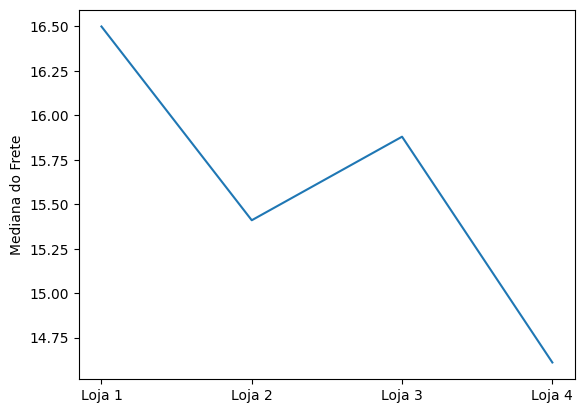


Frete Mediano
Loja 1 - 16.5
Loja 2 - 15.41
Loja 3 - 15.88
Loja 4 - 14.61



In [59]:
frete1 = loja1["Frete"].median()
frete2 = loja2["Frete"].median()
frete3 = loja3["Frete"].median()
frete4 = loja4["Frete"].median()
resultado = f"""
Frete Mediano
Loja 1 - {round(frete1, 2)}
Loja 2 - {round(frete2, 2)}
Loja 3 - {round(frete3, 2)}
Loja 4 - {round(frete4, 2)}
"""
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
valores = [round(frete1, 2), round(frete2, 2), round(frete3, 2), round(frete4, 2)]

plt.plot(lojas, valores)
plt.ylabel('Mediana do Frete')
plt.show()

print(resultado)